## Preprocessing

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN'], axis=1, inplace=True)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts().reset_index()
application_type_counts

,APPLICATION_TYPE,count
0,T3,27037
1,T4,1542
2,T6,1216
3,T5,1173
4,T19,1065
5,T8,737
6,T7,725
7,T10,528
8,T9,156
9,T13,66


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
bin_cutoff = 150
cutoff_labels = list(application_type_counts[application_type_counts["count"] < bin_cutoff]['APPLICATION_TYPE'])
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(lambda x: 'Other' if x in cutoff_labels else x)

# Replace in dataframe
# for app in application_types_to_replace:
#     application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_type_counts = application_df['CLASSIFICATION'].value_counts().reset_index()
classification_type_counts

,CLASSIFICATION,count
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
...,...,...
66,C4120,1
67,C8210,1
68,C2561,1
69,C4500,1


In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
threshold = 1
cutoff_labels = list(classification_type_counts[classification_type_counts["count"] <= threshold]['CLASSIFICATION'])
application_df = application_df[~application_df['CLASSIFICATION'].isin(cutoff_labels)]

application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C4100        6
C1720        6
C2400        6
C1600        5
C1257        5
C1260        3
C2710        3
C0           3
C1267        2
C1256        2
C1234        2
C1246        2
C3200        2
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
threshold = 1000
classifications_to_replace = list(classification_type_counts[classification_type_counts["count"] <= 1000]['CLASSIFICATION'])

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2235
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Look at feature types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34273 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34273 non-null  object
 1   APPLICATION_TYPE        34273 non-null  object
 2   AFFILIATION             34273 non-null  object
 3   CLASSIFICATION          34273 non-null  object
 4   USE_CASE                34273 non-null  object
 5   ORGANIZATION            34273 non-null  object
 6   STATUS                  34273 non-null  int64 
 7   INCOME_AMT              34273 non-null  object
 8   SPECIAL_CONSIDERATIONS  34273 non-null  object
 9   ASK_AMT                 34273 non-null  int64 
 10  IS_SUCCESSFUL           34273 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 3.1+ MB


In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
obj_columns = application_df.select_dtypes('object').columns
obj_columns = obj_columns.drop('NAME')

application_df = pd.get_dummies(application_df, columns=obj_columns)

In [12]:
# Check class balance
application_df['IS_SUCCESSFUL'].value_counts(normalize=True)

IS_SUCCESSFUL
1    0.532285
0    0.467715
Name: proportion, dtype: float64

In [13]:
application_df

,NAME,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,BLUE KNIGHTS MOTORCYCLE CLUB,1,5000,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,108590,1,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,1,5000,0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,SOUTHSIDE ATHLETIC ASSOCIATION,1,6692,1,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,142590,1,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,1,5000,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,1,5000,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
34296,PTA HAWAII CONGRESS,1,5000,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,1,5000,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [14]:
# Split our preprocessed data into our features and target arrays
labels = application_df['IS_SUCCESSFUL']
features = application_df.drop(['IS_SUCCESSFUL'], axis=1)

# Split the preprocessed data into a training and testing dataset
# I chose test size 10% because there are 34000 entries
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, test_size=0.1)

In [15]:
# Convert Name
from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer()
train_vectorized = vectorizer.fit_transform(X_train['NAME']).toarray()

test_vectorized = vectorizer.transform(X_test['NAME']).toarray()


In [16]:
# Drop names to re-add later
X_train.drop("NAME", inplace=True, axis=1)
X_test.drop("NAME", inplace=True, axis=1)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print('Shapes')
print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train.shape, y_test.shape)

Shapes
(30845, 44) (3428, 44)
(30845,) (3428,)


In [18]:
# Convert train and test sets to int, append vecrotized names
X_train_scaled = X_train_scaled.astype('int')
X_test_scaled = X_test_scaled.astype('int')

X_train_scaled = np.concatenate([X_train_scaled, train_vectorized], axis=1)
X_test_scaled = np.concatenate([X_test_scaled, test_vectorized], axis=1)

In [19]:
print('Shapes')
print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train.shape, y_test.shape)

Shapes
(30845, 13557) (3428, 13557)
(30845,) (3428,)


## Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Model 1 diverged, probably best to reduce model complexity to 8 and 4
tf.random.set_seed(42)

def build_nn_optimized(hp):
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
    tf.keras.backend.clear_session()
    nn_base = tf.keras.models.Sequential()
    nn_base.add(tf.keras.layers.InputLayer(input_shape=X_train_scaled.shape[1],))
    for i in range(hp.Int('num_layers', 1, 3)):
        nn_base.add(tf.keras.layers.Dense(units=hp.Int(f'units_{i}',
                                                       min_value=4,
                                                       max_value=128,
                                                       step=2),
                                                       activation='relu'))
        # Implementation of dropout layers
        nn_base.add(tf.keras.layers.Dropout(hp.Float(f'dropout_{i}',
                                                     min_value=0.5,
                                                     max_value=0.9,
                                                     step=0.05)))

# Output layer
    nn_base.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    nn_base.compile(optimizer=optimizer, metrics=['accuracy'], loss='binary_crossentropy')
    return nn_base

In [21]:
import keras_tuner as kt

tuner = kt.Hyperband(
    build_nn_optimized,
    objective="val_accuracy",
    max_epochs=30,
    hyperband_iterations=5)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Reloading Tuner from ./untitled_project/tuner0.json


In [22]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'num_layers': 3,
 'units_0': 82,
 'dropout_0': 0.6,
 'units_1': 24,
 'dropout_1': 0.55,
 'units_2': 128,
 'dropout_2': 0.55,
 'tuner/epochs': 4,
 'tuner/initial_epoch': 2,
 'tuner/bracket': 3,
 'tuner/round': 1,
 'tuner/trial_id': '0188'}

In [49]:
# Build model
model = build_nn_optimized(best_hyper)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 82)                1111756   
                                                                 
 dropout (Dropout)           (None, 82)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1992      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               3200      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [50]:
# Train the model
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=2)

def train_nn_model(nn, X, y, Xt, yt):
    history = nn.fit(X, y, epochs=3, verbose=1, validation_data=(Xt, yt), callbacks=[es], batch_size=256)
    return history


def plot_accuracy_loss(history):
    fig, ax = plt.subplots(1, 2, figsize=(16,8))
    ax[1].plot(history.history['accuracy'], label='accuracy')
    ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
    ax[1].set_title('Accuracy Metrics')
    ax[1].set_ylabel('Accuracy %')
    ax[1].set_xlabel('epoch')
    ax[1].legend(loc='best')
    ax[0].plot(history.history['loss'], label='loss')
    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].set_title('Loss Metrics')
    ax[0].set_ylabel('Loss %')
    ax[0].set_xlabel('epoch')
    ax[0].legend(loc='best')
    return fig

In [51]:
# Train model
history = train_nn_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Epoch 1/3
121/121 [==============================] - 2s 10ms/step - loss: 0.6078 - accuracy: 0.6802 - val_loss: 0.4627 - val_accuracy: 0.8069
Epoch 2/3
121/121 [==============================] - 1s 9ms/step - loss: 0.4679 - accuracy: 0.8036 - val_loss: 0.4170 - val_accuracy: 0.8209
Epoch 3/3
121/121 [==============================] - 1s 9ms/step - loss: 0.4222 - accuracy: 0.8256 - val_loss: 0.4040 - val_accuracy: 0.8296


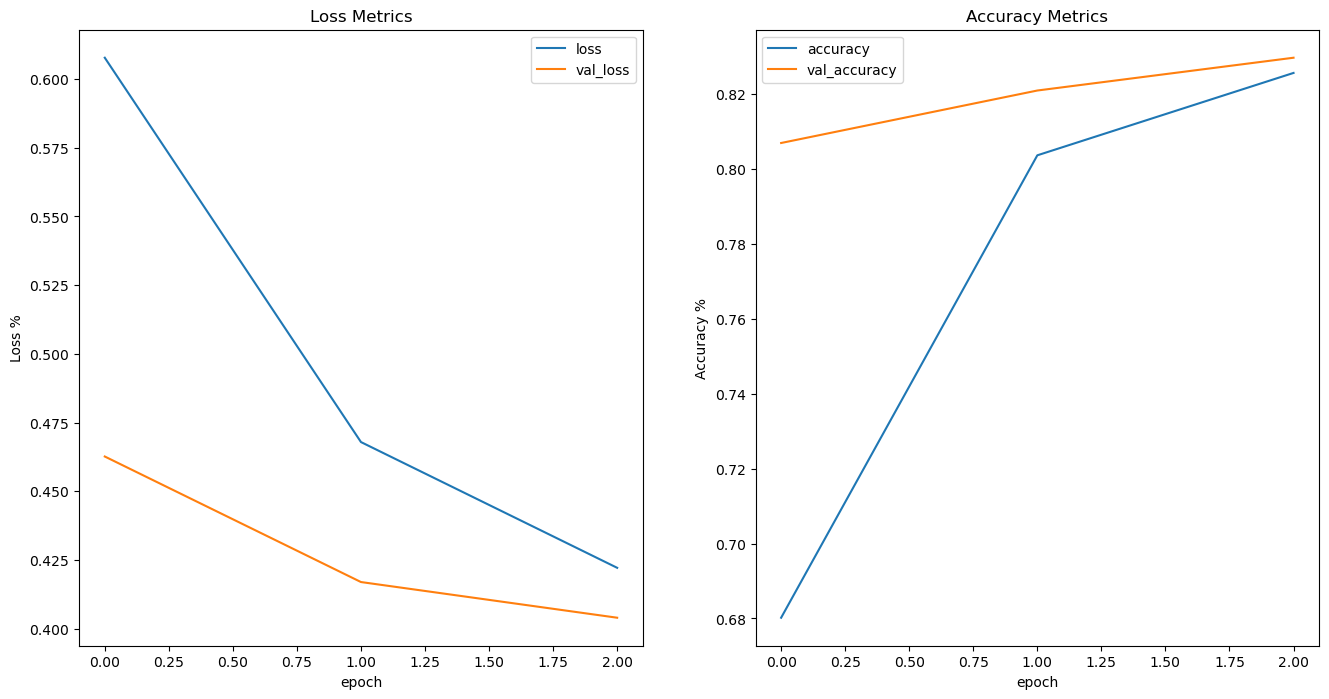

In [52]:
# Show plot
fig = plot_accuracy_loss(history)

In [54]:
# Save figure
fig.savefig(f'../Images/model_1_2_nlp_metrics/fnn-optimized-hpt.png')

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

108/108 - 0s - loss: 0.4040 - accuracy: 0.8296 - 106ms/epoch - 984us/step
Loss: 0.4039914906024933, Accuracy: 0.8296383023262024


In [55]:
# Export our model to HDF5 file
nn_directory = "Models/AlphabetSoupCharity_m1_optimized_hpt.h5"
# Save the model to a HDF5 file
model.save(nn_directory)

# Summary

* Vectorized `NAME` to see if branding plays a role in the company's success, this added 13513 features to the data.
* Implemented EarlyStopping to minimize validation loss.
* Used keras-tuner library to hyperparameter tune parameters. This improved model has 0.04% improved accuracy and has substantially increased performance. Validation data's loss and accuracy demonstrates that this model is good at generalizing data while minimizing error. This model reaches optimal performance after 2 epochs, instead of 37 in the un-tuned model.




In [60]:
from sklearn.metrics import confusion_matrix

y_test_probability = model.predict(X_test_scaled)
y_test_predictions = (y_test_probability > 0.5).astype(int)
asc_m3_matrix = confusion_matrix(y_test, y_test_predictions)

# Convert to dataframe
asc_m3_matrix_df = pd.DataFrame(asc_m3_matrix, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])


108/108 [==============================] - 0s 872us/step


Text(0.5, 1.0, 'Confusion Matrix')

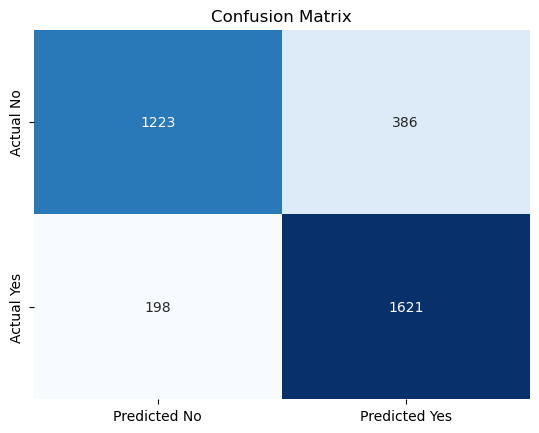

In [81]:
import seaborn as sns

heatmap = sns.heatmap(asc_m3_matrix_df, fmt='g', annot=True, cmap='Blues', cbar=False)
heatmap.set_title('Confusion Matrix')